# Regression Exercises

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from pydataset import data

#functions
import feature_engineering as fe

warnings.filterwarnings("ignore")

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# 1. Select a dataset with a continuous target variable.

In [2]:
swiss = data('swiss')

In [3]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


# 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [4]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [5]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [6]:
# rename cols to avoid problems formatting
swiss.rename(columns = {'Infant.Mortality': 'infant_mortality', 'Fertility': 'fertility', 'Agriculture': 'agriculture', 'Examination': 'exam', 'Education':'edu', 'Catholic': 'catholic'}, inplace = True)

In [7]:
swiss.head(3)

,fertility,agriculture,exam,edu,catholic,infant_mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2


### Use `prep4class` function to prep/split/scale dataset

In [8]:
X_train, X_train_scaled, y_train, X_validate, X_validate_scaled, y_validate, X_test, X_test_scaled, y_test = fe.prep4class(swiss, 'fertility')

In [9]:
X_train.shape, X_train_scaled.shape, y_train.shape, X_validate.shape, X_validate_scaled.shape, y_validate.shape, X_test.shape, X_test_scaled.shape, y_test.shape

((25, 5), (25, 5), (25,), (12, 5), (12, 5), (12,), (10, 5), (10, 5), (10,))

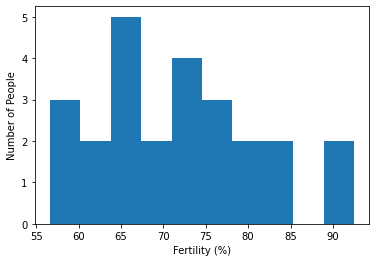

In [10]:
# visualization

plt.hist(y_train)
plt.xlabel("Fertility (%)")
plt.ylabel("Number of People")
plt.show()

# 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

#### Modeling: Baseline

In [11]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict fert_pred_mean
fert_pred_mean = y_train['fertility'].mean()
y_train['fert_pred_mean'] = fert_pred_mean
y_validate['fert_pred_mean'] = fert_pred_mean

# 2. compute fert_pred_median
fert_pred_median = y_train['fertility'].median()
y_train['fert_pred_median'] = fert_pred_median
y_validate['fert_pred_median'] = fert_pred_median

# 3. RMSE of fert_pred_mean
rmse_train = mean_squared_error(y_train.fertility, y_train.fert_pred_mean)**1/2
rmse_validate = mean_squared_error(y_validate.fertility, y_validate.fert_pred_mean)**1/2

print(f"""
      BASELINE:
      
      RMSE using Mean
      Train/In-Sample: {round(rmse_train, 2)}
      Validate/Out-of-Sample: {round(rmse_validate, 2)}
        """)

# 4. RMSE of fert_pred_median
rmse_train = mean_squared_error(y_train.fertility, y_train.fert_pred_median)**1/2
rmse_validate = mean_squared_error(y_validate.fertility, y_validate.fert_pred_median)**1/2

print(f"""
      RMSE using Median
      Train/In-Sample: {round(rmse_train, 2)}
      Validate/Out-of-Sample: {round(rmse_validate, 2)}
        """)





      BASELINE:
      
      RMSE using Mean
      Train/In-Sample: 47.76
      Validate/Out-of-Sample: 109.24
        

      RMSE using Median
      Train/In-Sample: 47.78
      Validate/Out-of-Sample: 109.89
        


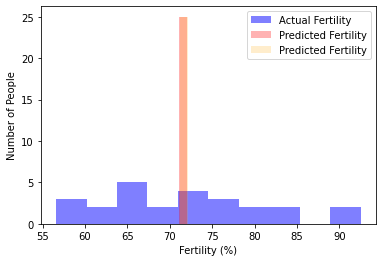

In [12]:
# plot to visualize actual vs predicted. 

plt.hist(y_train.fertility, color='blue', alpha=.5, label="Actual Fertility")
plt.hist(y_train.fert_pred_mean, bins=1, color='red', alpha=.3, rwidth=100, label="Predicted Fertility")
plt.hist(y_train.fert_pred_median, bins=1, color='orange', alpha=.2, rwidth=100, label="Predicted Fertility")
plt.xlabel("Fertility (%)")
plt.ylabel("Number of People")
plt.legend()
plt.show()

In [13]:
fert_pred_mean, fert_pred_median

(71.536, 71.7)

### Modeling: LinearRegression (OLS)

In [14]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.fertility)

# predict train
y_train['fert_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.fertility, y_train.fert_pred_lm)**1/2

# predict validate
y_validate['fert_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.fertility, y_validate.fert_pred_lm)**1/2

print(f"""
    RMSE for OLS using LinearRegression
    
    Training/In-Sample: {rmse_train}
    Validation/Out-of-Sample: {rmse_validate}
""")


    RMSE for OLS using LinearRegression
    
    Training/In-Sample: 10.447217249973196
    Validation/Out-of-Sample: 73.60166833238155



### Modeling: LassoLars

In [15]:
# create the model object
# I will leave α as the defaulted 1 for now
# since swiss DF has a small amt of features.
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.fertility)

# predict train
y_train['fert_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.fertility, y_train.fert_pred_lars)**1/2

# predict validate
y_validate['fert_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.fertility, y_validate.fert_pred_lars)**1/2

print(f"""
    RMSE for LassoLars
    
    Training/In-Sample: {rmse_train}
    Validation/Out-of-Sample: {rmse_validate}
""")


    RMSE for LassoLars
    
    Training/In-Sample: 39.61201133380875
    Validation/Out-of-Sample: 106.3445277084357



### Modeling: TweedieRegressor (GLM)

In [16]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.fertility)

# predict train
y_train['fert_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.fertility, y_train.fert_pred_glm)**1/2

# predict validate
y_validate['fert_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.fertility, y_validate.fert_pred_glm)**1/2

print(f"""
    RMSE for TweedieRegressor (GLM)
    power=1, alpha=0
    
    Training/In-Sample: {rmse_train}
    Validation/Out-of-Sample: {rmse_validate}
""")


    RMSE for TweedieRegressor (GLM)
    power=1, alpha=0
    
    Training/In-Sample: 10.03674771867773
    Validation/Out-of-Sample: 74.05882950990936



### Modeling: PolynomialFeatures

Transform X to a quadratic

In [17]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [18]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.fertility)

# predict train
y_train['fert_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.fertility, y_train.fert_pred_lm2)**1/2

# predict validate
y_validate['fert_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.fertility, y_validate.fert_pred_lm2)**1/2

print(f"""
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: {rmse_train}
    Validation/Out-of-Sample: {rmse_validate}
""")


    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: 3.352481318591016
    Validation/Out-of-Sample: 355.31026882568716



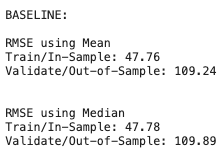 

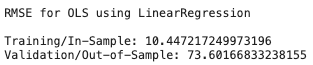 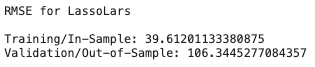 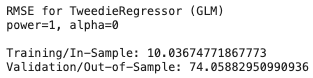 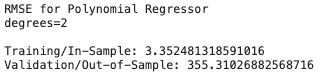 

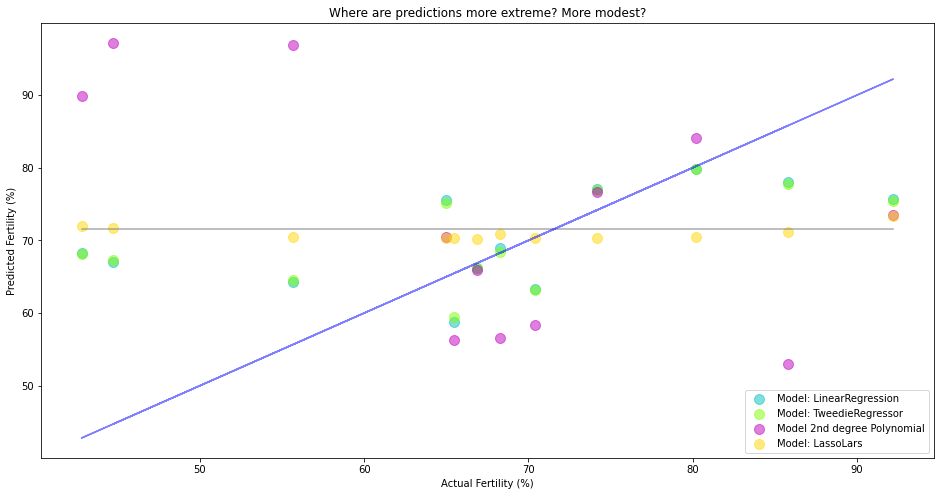

In [21]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.fertility, y_validate.fert_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.plot(y_validate.fertility, y_validate.fertility, alpha=.5, color="blue", label='_nolegend_')

plt.scatter(y_validate.fertility, y_validate.fert_pred_lm, 
            alpha=.5, color="c", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.fertility, y_validate.fert_pred_glm, 
            alpha=.5, color="chartreuse", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.fertility, y_validate.fert_pred_lm2, 
            alpha=.5, color="m", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.fertility, y_validate.fert_pred_lars, 
            alpha=.5, color="gold", s=100, label="Model: LassoLars")
plt.legend()
plt.xlabel("Actual Fertility (%)")
plt.ylabel("Predicted Fertility (%)")
plt.title("Where are predictions more extreme? More modest?")
plt.show()

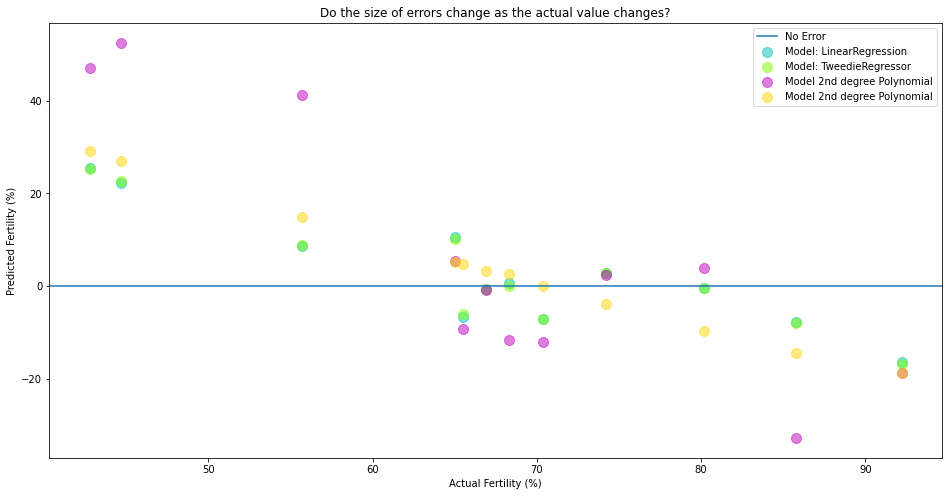

In [22]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.fertility, y_validate.fert_pred_lm-y_validate.fertility, 
            alpha=.5, color="c", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.fertility, y_validate.fert_pred_glm-y_validate.fertility, 
            alpha=.5, color="chartreuse", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.fertility, y_validate.fert_pred_lm2-y_validate.fertility, 
            alpha=.5, color="m", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.fertility, y_validate.fert_pred_lars-y_validate.fertility, 
            alpha=.5, color="gold", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Fertility (%)")
plt.ylabel("Predicted Fertility (%)")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

In [25]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

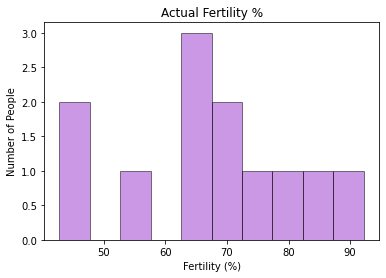

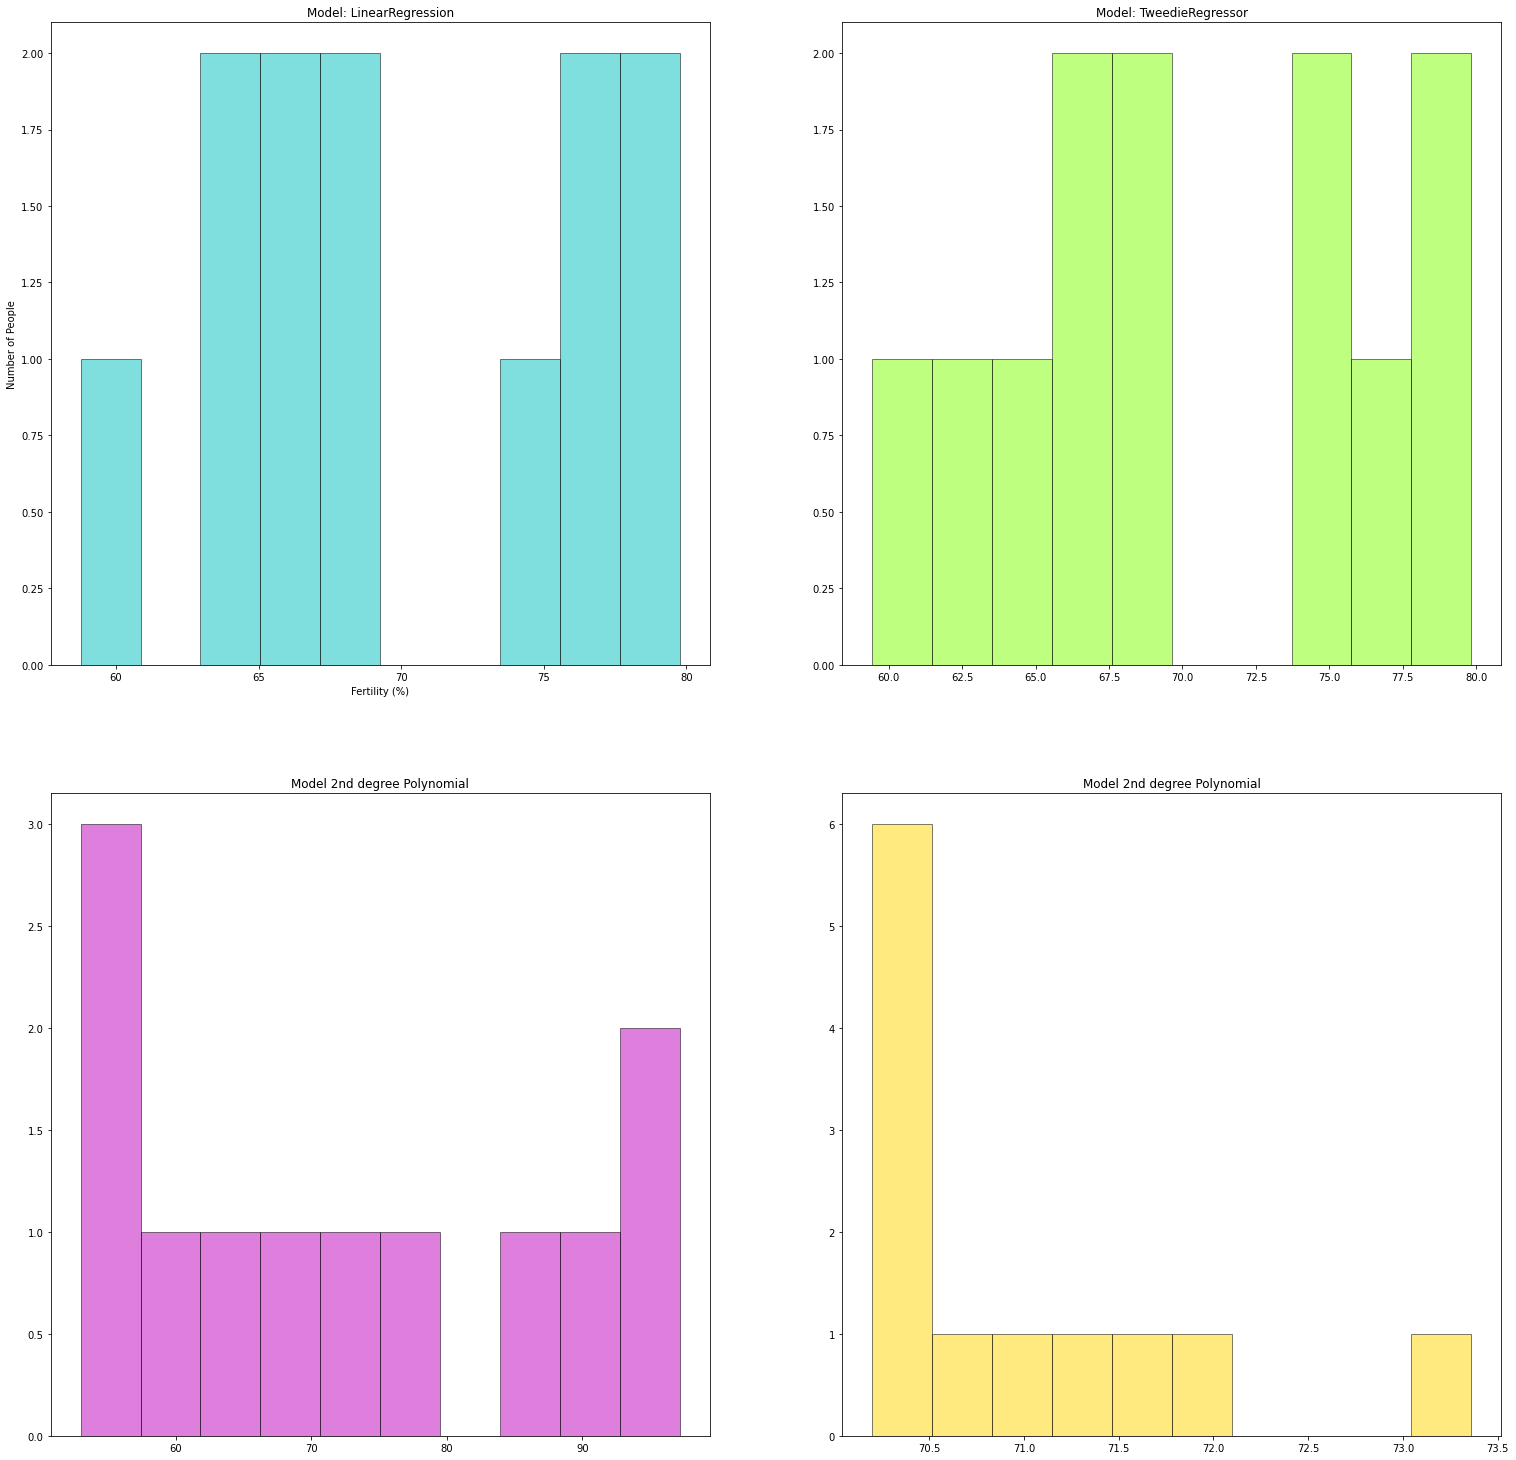

In [29]:
plt.hist(y_validate.fertility, color='darkorchid', alpha=.5, ec='black')
plt.xlabel("Fertility (%)")
plt.ylabel("Number of People")
plt.title("Actual Fertility %")
plt.show()


plt.figure(figsize=(26, 26))

plt.subplot(221)
plt.hist(y_validate.fert_pred_lm, color='c', alpha=.5, ec='black')
plt.xlabel("Fertility (%)")
plt.ylabel("Number of People")
plt.title("Model: LinearRegression")

plt.subplot(222)
plt.hist(y_validate.fert_pred_glm, color='chartreuse', alpha=.5, ec='black')
plt.title("Model: TweedieRegressor")

plt.subplot(223)
plt.hist(y_validate.fert_pred_lm2, color='m', alpha=.5, ec='black')
plt.title("Model 2nd degree Polynomial")

plt.subplot(224)
plt.hist(y_validate.fert_pred_lars, color='gold', alpha=.5, ec='black')
plt.title("Model 2nd degree Polynomial");

In [19]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['fert_pred_lm'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.fertility, y_test.fert_pred_lm)**1/2

print(f"""
    RMSE for OLS Model using LinearRegression
    
    Test/Out-of-Sample Performance: {rmse_test}
""")


    RMSE for OLS Model using LinearRegression
    
    Test/Out-of-Sample Performance: 57.03035640312929

